# Trend Predicting

* **Problem**: Trend Predicting based on user behaviors
* **Description**: 
  * Create online preference index for each major product group
  * Predict demand trends and draw insights by product group
  * Suggest new service from 1), 2)
* **Dataset**: ? non-numeric column, and ? numeric columns
  * ? : ?
  * Non-numeric columns:
    * 16 non-numeric columns : ?
  * Numeric columns: 
    * 104 numeric columns : ?
 


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import os

import datetime

# Load Data

* 'custom.csv'
* 'search1.csv'
* 'search2.csv'
* 'master.csv'
* 'session.csv'
* 'product.csv'


In [3]:
path = Path().resolve().parents[0]
product = pd.read_csv(os.path.join(path, 'Dataset', 'Product.csv'))
search1 = pd.read_csv(os.path.join(path, 'Dataset', 'Search1.csv'))
search2 = pd.read_csv(os.path.join(path, 'Dataset', 'Search2.csv'))
custom = pd.read_csv(os.path.join(path, 'Dataset', 'Custom.csv'))
session = pd.read_csv(os.path.join(path, 'Dataset', 'Session.csv'))
master = pd.read_csv(os.path.join(path, 'Dataset', 'Master.csv'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Merge Data
1) Merge product purchase data to see features which is expected to affect on purchase of client bought given product group, not individual product

- Merge following csv files
    * Product.csv : CLNT_ID, SESS_ID(Brdige), PD_C(Bridge), PD_BUY_CT, PD_BUY_AM
    * Master.csv : PD_C(Bridge), CLAC1_NM, CLAC2_NM, CLAC3_NM
    * Session.csv : SESS_ID(Bridge), SESS_DT, DVC_CTG_NM, ZON_NM, CITY_NM
    * Custom.csv : CLNT_ID, CLNT_GENDER, CLNT_AGE
    
    
- To get data below
  
  
- Client Information
    * CLNT_ID : Client ID (Primary Key)
    * CLNT_GENDER : Client Gender
    * CLNT_AGE : Client Age
    * DVC_CTG_NM : Client Device
    * ZON_NM : Client Location (briefly)
    * CITY_NM : Client Location (in detail)
    
- Purchase Information
    * SESS_DT : Session Date
    * PD_BUY_CT : Number of product purchased
    * PD_BUY_AM : Price of product purchased
    
- Product Information
    * CLAC1_NM : Product group (largest)
    * CLAC2_NM : Product group (moderate)
    * CLAC3_NM : Product group (smallest)
    
    
    
    
  

In [4]:
merge1 = pd.merge(product, master)
merge1 = merge1.drop(['HITS_SEQ','PD_C', 'PD_ADD_NM', 'PD_BRA_NM', 'PD_NM'], axis=1)
merge2 = pd.merge(merge1, session)
merge2 = merge2.drop(['SESS_ID', 'SESS_SEQ','TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V'], axis=1)
merge3 = pd.merge(merge2, custom)

## Legacy : please ignore




In [19]:
'''
client_for_clustering = []

# for every client
for clnt_idx, clnt_num in enumerate(clnt_id) :
    if clnt_idx <= 100:
        # in a single client
        client = merge3[merge3['CLNT_ID']==clnt_num].copy()
        client.reset_index(drop=True, inplace=True)
        
        # 1) for every combination of clac_nm (CLAC1_NM, CLAC2_NM, CLAC3_NM)
        clac_nm = client[['CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM']].copy().drop_duplicates()
        get_attributes(client, clac_nm, client_for_clustering, 3)
            
            
        # 2) for every combination of clac_nm (CLAC1_NM, CLAC2_NM)
        clac_nm = client[['CLAC1_NM', 'CLAC2_NM']].copy().drop_duplicates()
        get_attributes(client, clac_nm, client_for_clustering, 2)
        
        # 3) for every combination of clac_nm (CLAC1_NM)
        clac_nm = client[['CLAC1_NM']].copy().drop_duplicates()
        get_attributes(client, clac_nm, client_for_clustering, 1)

    else :
        break;
            
client_for_clustering = pd.DataFrame(client_for_clustering)
client_for_clustering.columns = ['CLNT_ID',
                               'CLAC1_NM',
                               'CLAC2_NM',
                               'CLAC3_NM',
                               'TOTAL_PRICE',
                               'TOTAL_COUNT',
                               'TOTAL_AMOUNT',
                               'AVG_PRICE',
                               'AVG_AMOUNT',
                               'RECENT',
                               'FIRST_TIME',
                               'REPEAT',
                               'LAPSED',
                               'ZON_NM',
                               'CITY_NM',
                               'CLNT_GENDER',
                               'CLNT_AGE']

client_for_clustering
'''

"\nclient_for_clustering = []\n\n# for every client\nfor clnt_idx, clnt_num in enumerate(clnt_id) :\n    if clnt_idx <= 100:\n        # in a single client\n        client = merge3[merge3['CLNT_ID']==clnt_num].copy()\n        client.reset_index(drop=True, inplace=True)\n        \n        # 1) for every combination of clac_nm (CLAC1_NM, CLAC2_NM, CLAC3_NM)\n        clac_nm = client[['CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM']].copy().drop_duplicates()\n        get_attributes(client, clac_nm, client_for_clustering, 3)\n            \n            \n        # 2) for every combination of clac_nm (CLAC1_NM, CLAC2_NM)\n        clac_nm = client[['CLAC1_NM', 'CLAC2_NM']].copy().drop_duplicates()\n        get_attributes(client, clac_nm, client_for_clustering, 2)\n        \n        # 3) for every combination of clac_nm (CLAC1_NM)\n        clac_nm = client[['CLAC1_NM']].copy().drop_duplicates()\n        get_attributes(client, clac_nm, client_for_clustering, 1)\n\n    else :\n        break;\n            \ncl

## Copy & Paste code below

In [5]:
def get_attributes(client, clnt_num, clac_nm, client_for_clustering, num_combination) : 

    for clac_idx in range(clac_nm.shape[0]) :

        # attributes to save
        total_price = 0
        total_count = 0
        total_amount = 0
            
        recent = 0
        first_time = 0
        repeat = 0
        lapsed = 0
            
        # variables (not saved)
        latest_purchase = datetime.datetime(2018,1,1)
        lastday = datetime.datetime(2018,9,29)
            
        # loop rows of each client
        for pur_idx in range(client.shape[0]) :
            if num_combination == 3 : 
                purchased = client[['CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM']].iloc[pur_idx, :]
            if num_combination == 2 :
                purchased = client[['CLAC1_NM', 'CLAC2_NM']].iloc[pur_idx, :]
            if num_combination == 1 :
                purchased = client[['CLAC1_NM']].iloc[pur_idx, :]
            unique_cn = clac_nm.iloc[clac_idx, :]
                
            if purchased.equals(unique_cn) :

                temp = str(client.iloc[pur_idx, :]['SESS_DT'])
                today = datetime.datetime(int(temp[0:4]), int(temp[4:6]), int(temp[6:8]))
                if (today-latest_purchase).days >= 0 :
                    latest_purchase = today  
                total_price += int(client[['PD_BUY_AM']].iloc[pur_idx, 0].replace(',', '')) * int(client[['PD_BUY_CT']].iloc[pur_idx, 0])
                total_count += 1
                total_amount += int(client[['PD_BUY_CT']].iloc[pur_idx, 0])
            
        # attributes to save
        average_price = int(total_price/total_amount)
        average_amount = int(total_amount/total_count)
        if (lastday - latest_purchase).days <= 30 :
            recent = 1
            if total_count == 1 :
                first_time = 1
        if total_count >= 2 :
            repeat = 1
        if (lastday - latest_purchase).days >= 120 :
            lapsed = 1
        
        if num_combination == 3 :
            new_row = [clnt_num, 
                    unique_cn[0], 
                    unique_cn[1], 
                    unique_cn[2], 
                    total_price,
                    total_count,
                    total_amount,
                    average_price,
                    average_amount,
                    recent,
                    first_time,
                    repeat,
                    lapsed,
                    client['ZON_NM'][0],
                    client['CITY_NM'][0],
                    client['CLNT_GENDER'][0],
                    client['CLNT_AGE'][0]]  
        if num_combination == 2 :
            new_row = [clnt_num, 
                    unique_cn[0], 
                    unique_cn[1], 
                    'NaN', 
                    total_price,
                    total_count,
                    total_amount,
                    average_price,
                    average_amount,
                    recent,
                    first_time,
                    repeat,
                    lapsed,
                    client['ZON_NM'][0],
                    client['CITY_NM'][0],
                    client['CLNT_GENDER'][0],
                    client['CLNT_AGE'][0]]  
        if num_combination == 1 :
            new_row = [clnt_num, 
                    unique_cn[0], 
                    'NaN', 
                    'NaN', 
                    total_price,
                    total_count,
                    total_amount,
                    average_price,
                    average_amount,
                    recent,
                    first_time,
                    repeat,
                    lapsed,
                    client['ZON_NM'][0],
                    client['CITY_NM'][0],
                    client['CLNT_GENDER'][0],
                    client['CLNT_AGE'][0]]  

        client_for_clustering.append(new_row)

In [6]:
def how_many_clients(clacset) : 
    length = 3
    if clacset[2] == 'NaN' :
        length -= 1
    if clacset[1] == 'NaN' :
        length -= 1    

    target = merge3[merge3['CLAC1_NM']==clacset[0]].copy()
    if length >= 2 :
        target = target[target['CLAC2_NM']==clacset[1]].copy()
    if length >= 3 : 
        target = target[target['CLAC3_NM']==clacset[2]].copy()
    
    print(target['CLNT_ID'].unique().shape[0])
    return target['CLNT_ID'].unique().shape[0]

31231


31231

In [7]:
def get_dataset_for_clac(clacset, num_clients) :
    # set numbers of clac_nm
    length = 3
    if clacset[2] == 'NaN' :
        length -= 1
    if clacset[1] == 'NaN' :
        length -= 1
    
    target = merge3[merge3['CLAC1_NM']==clacset[0]].copy()
    if length >= 2 :
        target = target[target['CLAC2_NM']==clacset[1]].copy()
    if length >= 3 : 
        target = target[target['CLAC3_NM']==clacset[2]].copy()
    client_for_clustering = []
    
    clnt_id = target['CLNT_ID'].unique()
    clac1_nm = target['CLAC1_NM'].unique()
    clac2_nm = target['CLAC2_NM'].unique()
    clac3_nm = target['CLAC3_NM'].unique()
          
    # for every client
    for clnt_idx, clnt_num in enumerate(clnt_id) :
        if clnt_idx <= num_clients:
            # in a single client
            client = target[target['CLNT_ID']==clnt_num].copy()
            client.reset_index(drop=True, inplace=True)
        
            # 1) for every combination of clac_nm (CLAC1_NM, CLAC2_NM, CLAC3_NM)
            if length == 3 :
                clac_nm = client[['CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM']].copy().drop_duplicates()
                get_attributes(client, clnt_num, clac_nm, client_for_clustering, 3)
                    
            # 2) for every combination of clac_nm (CLAC1_NM, CLAC2_NM)
            if length == 2 :
                clac_nm = client[['CLAC1_NM', 'CLAC2_NM']].copy().drop_duplicates()
                get_attributes(client, clnt_num, clac_nm, client_for_clustering, 2)
        
            # 3) for every combination of clac_nm (CLAC1_NM)
            if length == 1 : 
                clac_nm = client[['CLAC1_NM']].copy().drop_duplicates()
                get_attributes(client, clnt_num, clac_nm, client_for_clustering, 1)

        else :
            break;
            
    client_for_clustering = pd.DataFrame(client_for_clustering)
    client_for_clustering.columns = ['CLNT_ID',
                               'CLAC1_NM',
                               'CLAC2_NM',
                               'CLAC3_NM',
                               'TOTAL_PRICE',
                               'TOTAL_COUNT',
                               'TOTAL_AMOUNT',
                               'AVG_PRICE',
                               'AVG_AMOUNT',
                               'RECENT',
                               'FIRST_TIME',
                               'REPEAT',
                               'LAPSED',
                               'ZON_NM',
                               'CITY_NM',
                               'CLNT_GENDER',
                               'CLNT_AGE']

    return client_for_clustering

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

def transform_scale_df(df) :
    # cataegory -> numeric, in later version it should be modifed as one-hot vector
    for idx, column in enumerate(df.dtypes) :
        if column == object and idx >= 4:
            df.iloc[:, idx] = pd.factorize(df.iloc[:, idx])[0]
    
    # scale
    for idx, column in enumerate(df.columns) :
        if idx >= 4 :
            df.iloc[:, idx] = scaler.fit_transform(pd.DataFrame(df.iloc[:, idx]))
    
    return df

In [9]:
from sklearn.cluster import KMeans

def get_cluster_for_clac(clacset, num_clients, method, test=False, k=0) :
    dataset = get_dataset_for_clac(clacset, num_clients)
    dataset = transform_scale_df(dataset)
    # code below should be updated when we get different attributes for customer clustering
    
    if method == "kmeans" : 
        if test == False :
            km = KMeans(n_clusters=k)
            km.fit(dataset.iloc[:, 4:])
            labels = pd.DataFrame(km.labels_)
            labels.columns = ['CLUSTER']
            results = pd.concat([dataset,labels], axis=1)
            return results
        elif test == True :
            Sum_of_squared_distances = []
            K = range(1,k)
            for k in K:
                km = KMeans(n_clusters=k)
                km = km.fit(dataset.iloc[:, 4:])
                Sum_of_squared_distances.append(km.inertia_)
            plt.plot(K, Sum_of_squared_distances, 'bx-')
            plt.xlabel('k')
            plt.ylabel('Sum_of_squared_distances')
            plt.title('Elbow Method For Optimal k')
            plt.show()


97149


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.f

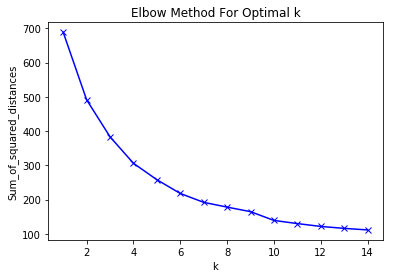

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.f

,CLNT_ID,CLAC1_NM,CLAC2_NM,CLAC3_NM,TOTAL_PRICE,TOTAL_COUNT,TOTAL_AMOUNT,AVG_PRICE,AVG_AMOUNT,RECENT,FIRST_TIME,REPEAT,LAPSED,ZON_NM,CITY_NM,CLNT_GENDER,CLNT_AGE,CLUSTER
0,4350334,화장품/뷰티케어,메이크업,NaN,0.148669,0.14,0.14,0.378802,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.4,0
1,5444959,화장품/뷰티케어,메이크업,NaN,0.008264,0.00,0.00,0.336406,0.0,0.0,0.0,0.0,0.0,0.066667,0.011364,0.0,0.4,5
2,5461276,화장품/뷰티케어,메이크업,NaN,0.026072,0.02,0.02,0.336406,0.0,0.0,0.0,1.0,1.0,0.133333,0.022727,0.0,0.4,2
3,5482254,화장품/뷰티케어,메이크업,NaN,0.055523,0.02,0.03,0.543779,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.6,0
4,5153670,화장품/뷰티케어,메이크업,NaN,0.008264,0.00,0.00,0.336406,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.4,4


In [13]:
# 1. 보고싶은 제품군
clacset = ['화장품/뷰티케어', '메이크업', 'NaN'] 
#clacset = ['화장품/뷰티케어', '메이크업', '블러셔/쉐이딩/하이라이터'] 

# 2. 해당 제품군을 구매한 사람이 몇명인지
how_many_clients(clacset)

# 3. 몇명을 불러와서 클러스터링할지 -> 해당 제품군의 소비자중 1000명에 대한 클러스터링 결과가 나옴
num_clients = 1000

# 4. 클러스터의 개수를 몇개로 할지 정하고 싶을때, k : max k
get_cluster_for_clac(clacset, num_clients, 'kmeans', k=15, test=True)

# 5. 클러스터 개수를 정했을때 그 데이터프레임을 내놓아라, k : # of clusters, output : Pandas DataFrame
get_cluster_for_clac(clacset, num_clients, 'kmeans', k=10).head()

2) 